In [1]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from mynn import *

## Demo 1: NN using Cross Entropy loss

### Create Dataset

In [2]:
with open('mnist.pkl', 'rb') as f:
    data = pickle.load(f)

train_img = np.transpose(data['train_img'])
train_img = train_img/255   # normalisation
train_label = data['train_label']
test_img = np.transpose(data['test_img'])
test_img = test_img/255     # normalisation
test_label = data['test_label']

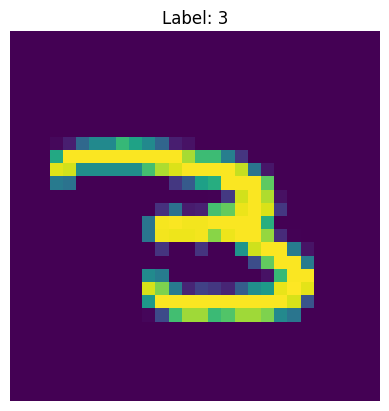

In [20]:
idx = 250
plt.imshow(np.reshape(train_img[:, idx], (28,28)))
plt.title(f'Label: {train_label[idx]}')
plt.axis('off')
plt.show()

### Calculate the accuracy of the model

In [3]:
def get_accuracy(test_img, test_label, model):
    n = np.size(test_label)
    y_hat = model.predict(test_img)
    prediction = np.argmax(y_hat, axis=0)
    accuracy = sum(prediction == test_label)/n*100
    print(f"Accuracy: {np.round(accuracy, 3)}")

### Create model and train the model

In [4]:
model = Network()

model.add(MLP(784, 50))
model.add(Relu(50))
model.add(MLP(50, 10))
model.add(Softmax(10))

model.train(train_img, train_label, lr=0.1, epoch=500)


### Verify that the model is trained properly

In [5]:
get_accuracy(test_img, test_label, model)

Accuracy: 89.61


## Demo 2: Neural Network using Mean-Sqaure error

### Create dataset

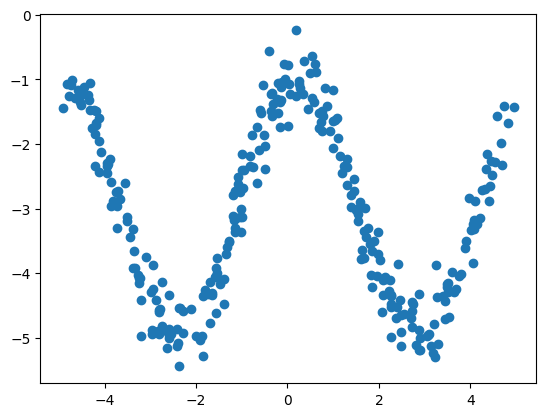

In [6]:
def my_func(x, freq, phase_offset, amp, bias):
    return amp*np.sin(freq*x+phase_offset) + bias
amp = 2
bias = -3
freq = 1.2
phase_offset = 1.3
samples = 300

x = np.random.rand(1, samples)*10-5
y = my_func(x, freq, phase_offset, amp, bias)
y += np.random.normal(loc=0, scale=0.3, size=(1, samples))

plt.scatter(x, y)
plt.show()

### Create model and train model

In [7]:
model = Network()

model.add(MLP(1, 64))
model.add(Relu(64))
model.add(MLP(64, 64))
model.add(Relu(64))
model.add(MLP(64, 64))
model.add(Relu(64))
model.add(MLP(64, 1))
model.add(MSE())

model.train(x, y, lr=5e-4, epoch=7000)

### See how well the data fits the model

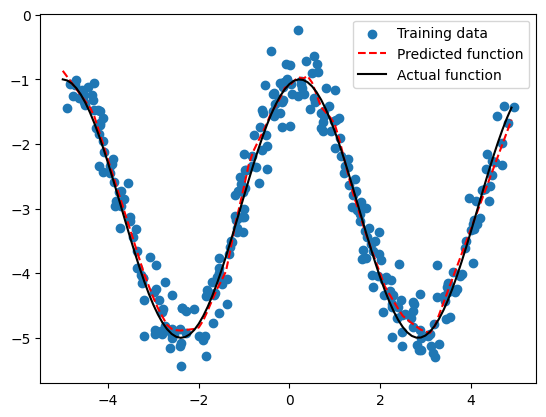

In [11]:
x_predict = np.arange(-5, 5, 0.1)
x_predict = np.reshape(x_predict, (1, np.size(x_predict)))
y_predict = model.predict(x_predict)
y_actual = my_func(x_predict, freq, phase_offset, amp, bias)

plt.scatter(x, y, label='Training data')
plt.plot(x_predict.flatten(), y_predict.flatten(), 'r--', label='Predicted function')
plt.plot(x_predict.flatten(), y_actual.flatten(), 'k-', label='Actual function')
plt.legend()
plt.show()

### Data outside the domain

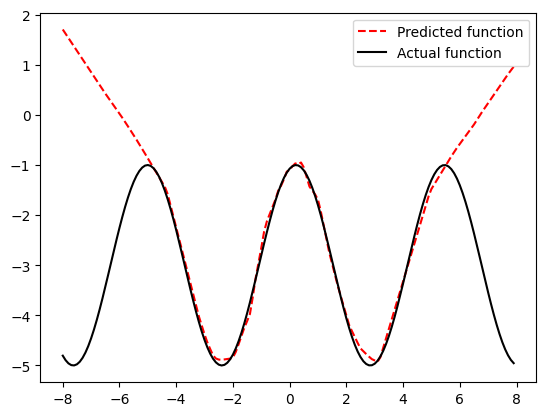

In [12]:
x_predict = np.arange(-8, 8, 0.1)
x_predict = np.reshape(x_predict, (1, np.size(x_predict)))
y_predict = model.predict(x_predict)
y_actual = my_func(x_predict, freq, phase_offset, amp, bias)

plt.plot(x_predict.flatten(), y_predict.flatten(), 'r--', label='Predicted function')
plt.plot(x_predict.flatten(), y_actual.flatten(), 'k-', label='Actual function')
plt.legend()
plt.show()